In [168]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [169]:
#TODO handle multiple classes
#TODO connect neurons into ANN
#TODO follow conventions in https://dbader.org/blog/meaning-of-underscores-in-python

In [170]:
class Neuron:
    def __init__(self, af_type, weights=np.array([])):
        self.af_type = af_type
        self.weights = weights

    def activate(self, input):
        return self.activation_function(np.dot(input, self.weights))

    def activation_function(self, a):
        if self.af_type == 'sigmoid':
            return 1/(1+np.exp(-a))
        
    def visualise(self, lab_input, lab_output, dim1=0, dim2=1, setpoint=np.array([]), toggle3d=False, n=100):          
        xs = np.linspace(0, 1, n)
        
        if np.shape(self.weights) == 1:
            a = np.empty(n)
            a = [self.activate(x) for x in xs]

            fig, ax = plt.subplots(1, 1, figsize=(6, 6))

            ax.plot(xs, a, cmap=cm.PiYG)
            ax.scatter(lab_input, lab_output, c=lab_output, cmap=cm.PiYG)
        else:
            if setpoint.size == 0 and np.shape(lab_input)[1] > 2:
                setpoint = 0.5*np.ones(np.shape(lab_input)[1]-2)

            aa = np.empty((n, n))
            for i, x1 in enumerate(xs):
                for j, x2 in enumerate(xs):
                    if setpoint.size > 0:
                        ip = setpoint
                        ip = np.insert(ip, [dim1, dim2], [x1, x2])
                    else:
                        ip = [x1, x2]
                    aa[i,j] = self.activate(ip)

            xx1, xx2 = np.meshgrid(xs, xs)
            
            if toggle3d:
                fig = plt.figure(figsize=(6,6))
                ax = fig.add_subplot(111, projection='3d')

                ax.plot_surface(xx1, xx2, aa, cmap=cm.PiYG)
                ax.scatter(lab_input[...,dim1].ravel(), lab_input[...,dim2].ravel(), lab_output, c=lab_output, edgecolors='k', cmap=cm.PiYG)
            else:
                fig, ax = plt.subplots(1, 1, figsize=(6, 6))

                ax.contourf(xx1, xx2, aa, 25, cmap=cm.PiYG)
                ax.scatter(lab_input[...,dim1].ravel(), lab_input[...,dim2].ravel(), c=lab_output, edgecolors='k', cmap=cm.PiYG)

        plt.show()

        return fig, ax

In [171]:
class Training:
    def __init__(self, l_inputs, l_outputs, training_type):
        self.training_type = training_type
        self.l_inputs = l_inputs
        self.l_outputs = l_outputs
    
    def train(self, neuron_tt, step_size, thresh, max_steps, w_decay=0.01):
        N = np.shape(self.l_inputs)[0]
        N_params = np.shape(self.l_inputs)[1]
        
        if self.training_type == 'mlf':
            weights = np.random.rand(N_params)
            dG = np.ones(N_params)

            steps = 0

            while all(np.abs(dG) > thresh):
                neuron_tt.weights = weights

                outputs = np.array([])
                for l_input in self.l_inputs:
                    output = neuron_tt.activate(l_input)
                    outputs = np.append(outputs, output)

                dG = np.array([])
                for l_input_col in self.l_inputs.T:
                    dG = np.append(dG, -np.sum(np.multiply((self.l_outputs - outputs),l_input_col)))

                weights -= step_size*dG
                steps += 1

                if steps > max_steps:
                    f'Training Failed {dG}'
                    break

        elif self.training_type == 'rmlf':
            weights = np.random.rand(N_params)
            dM = np.ones(N_params)

            steps = 0

            while all(np.abs(dM) > thresh):
                neuron_tt.weights = weights

                outputs = np.array([])
                for l_input in self.l_inputs:
                    output = neuron_tt.activate(l_input)
                    outputs = np.append(outputs, output)

                dM = np.array([])
                for i, l_input_col in enumerate(self.l_inputs.T):
                    dM = np.append(dM, -np.sum(np.multiply((self.l_outputs - outputs),l_input_col) + w_decay*neuron_tt.weights[i]))

                weights -= step_size*dM
                steps += 1

                if steps > max_steps:
                    f'Training Failed {dM}'
                    break

        return weights

In [179]:
tx = np.array([[0.1,0.1],[0.2, 0.2],[0.3, 0.3],[0.7, 0.7],[0.8, 0.8],[0.9, 0.9]])
ty = np.array([0,0,0,1,1,1])

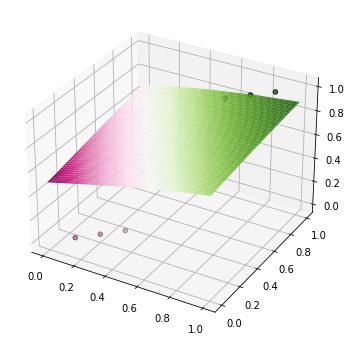

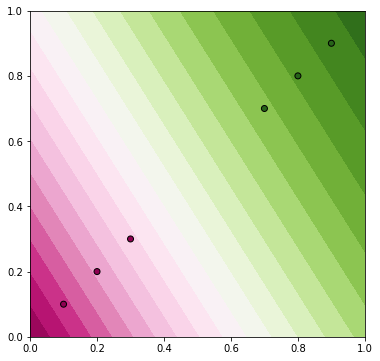

In [182]:
ntt =  Neuron('sigmoid')
tn = Training(tx, ty, 'mlf')
w = tn.train(ntt, 0.001, 0.001, 40000, 0.01)
fig, ax = ntt.visualise(tx, ty, toggle3d=True)
figc, axc = ntt.visualise(tx, ty)

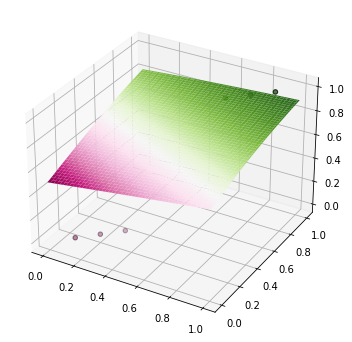

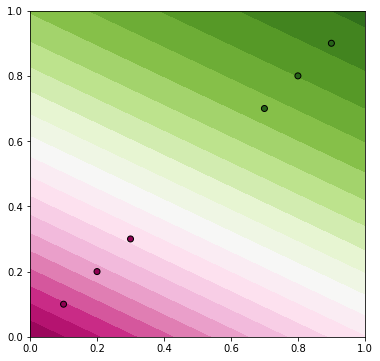

In [183]:
ntt2 = Neuron('sigmoid')
tn2 = Training(tx, ty, 'rmlf')
w2 = tn2.train(ntt2, 0.001, 0.001, 40000, 0.01)
fig2, ax2 = ntt2.visualise(tx, ty, toggle3d=True)
figc2, axc2 = ntt2.visualise(tx, ty)